In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#执行第一步，连接谷歌云盘

Mounted at /content/drive


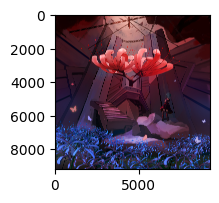

In [ ]:
I = mpimg.imread('/content/drive/MyDrive/python 研究/6彼岸开绽2 .jpg')
plt.figure(figsize=(2,2))
plt.imshow(I)
#检查是否连上了谷歌云

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# 加载图像
image1 = cv2.imread('/content/drive/MyDrive/python 研究/轮廓，实验1206.png')
image2=cv2.imread('/content/drive/MyDrive/python 研究/轮廓，真实1206.png')

# 执行边缘检测

In [ ]:
#对第一个图像
# 转换为灰度图像
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# 边缘检测
edges = cv2.Canny(gray, 50, 100)

# 直线检测
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=8, minLineLength=5, maxLineGap=10)
  #threshold 越小，直线会判定越多   minLineLength直线最小长度，小于此长度将会被忽略 maxLineGap 同一直线上允许的最大间隔，大于此数字，将会被视为不同线段



#对第二个图
# 转换为灰度图像
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# 边缘检测
edges2 = cv2.Canny(gray2, 50, 100)

# 直线检测
lines2 = cv2.HoughLinesP(edges2, 1, np.pi / 180, threshold=5, minLineLength=5, maxLineGap=10)


**对第一个图执行操作**

In [ ]:
# 转化为矢量线
vector_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    vector_lines.append([(x1, y1), (x2, y2)])

In [ ]:
vector_lines[0]

[(643, 663), (734, 468)]

In [ ]:
point_A=[]
for line in lines:
  x1, y1, x2, y2 = line[0]
  point_A.append((x1,y1))
  point_A.append((x2,y2))

In [ ]:
point_A[0]

(643, 663)

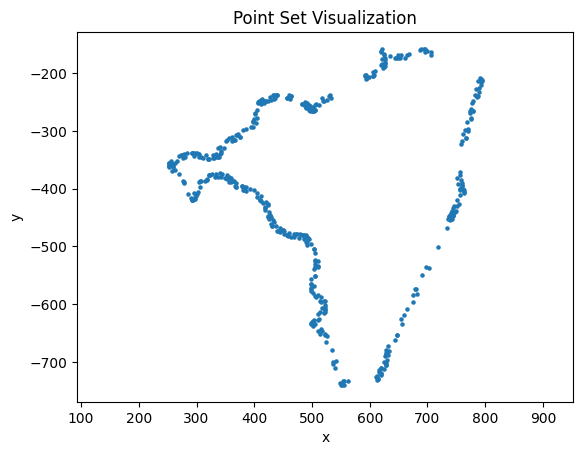

In [ ]:
import matplotlib.pyplot as plt

# 从点集列表A中提取x坐标和y坐标
x = [point[0] for point in point_A]
y = [-point[1] for point in point_A]

# 设置点的大小
point_size = 5  # 设置点的大小为50


# 绘制散点图
plt.scatter(x, y, s=point_size)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Set Visualization')

# 设置X轴和Y轴比例为1:1
plt.axis('equal')



# 显示图形
plt.show()

**对第二个图执行边缘检测**

In [ ]:
point_B=[]
for line in lines2:
  x1, y1, x2, y2 = line[0]
  point_B.append((x1,y1))
  point_B.append((x2,y2))

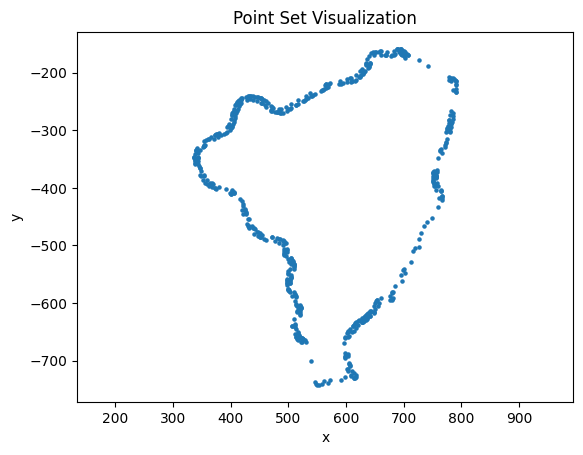

In [ ]:
import matplotlib.pyplot as plt
# 从点集列表B中提取x坐标和y坐标
x = [point[0] for point in point_B]
y = [-point[1] for point in point_B]

# 设置点的大小
point_size = 5  # 设置点的大小为50


# 绘制散点图
plt.scatter(x, y, s=point_size)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Set Visualization')

# 设置X轴和Y轴比例为1:1
plt.axis('equal')



# 显示图形
plt.show()

**将它们显示至同一个平面上**

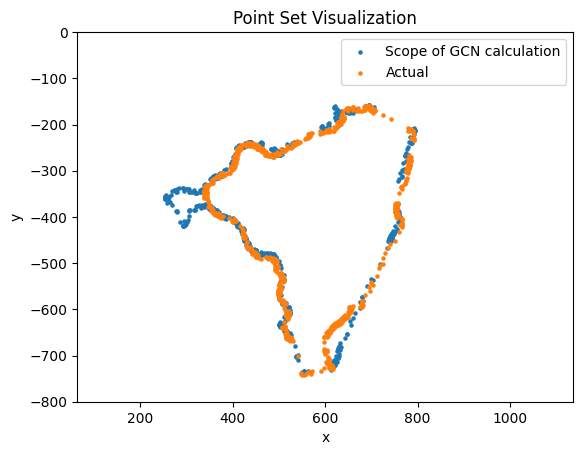

In [ ]:
# 从点集列表A中提取x坐标和y坐标
x = [point[0] for point in point_A]
y = [-point[1] for point in point_A]



# 设置点的大小
point_size = 5  # 设置点的大小为50


# 绘制散点图
P1=plt.scatter(x, y, s=point_size,label="Scope of GCN calculation")




# 从点集列表B中提取x坐标和y坐标
x1 = [point[0] for point in point_B]
y1 = [-point[1] for point in point_B]

# 设置点的大小
point_size = 5  # 设置点的大小为50


# 绘制散点图
P2=plt.scatter(x1, y1, s=point_size,label="Actual")

plt.legend(loc='upper right',fontsize=10) # 添加图例

plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Set Visualization')

# 设置X轴和Y轴比例为1:1

plt.axis('equal')
plt.axis([200,1000,-800,0])


# 显示图形
plt.show()

# 执行豪斯多夫距离相似度

**总结已经有的信息**

In [ ]:
#计算机判断的街区轮廓的点集
print(point_A[0])
print(len(point_A))

(643, 663)
466


In [ ]:
#实际的城市街区轮廓点集
print(point_B[1])
print(len(point_B))

(557, 232)
594


**开始计算豪斯多夫距离相似度**

In [ ]:
A=point_A
B=point_B

In [ ]:
import math
from statistics import median
def similarity(A, B):
  min_dists_a = []
  for a in A:
    # 计算每个点a到点集B的最近距离
    min_dist = min([math.hypot(a[0]-b[0], a[1]-b[1]) for b in B])
    min_dists_a.append(min_dist)

  min_dists_b = []
  for b in B:
    # 计算每个点b到点集A的最近距离
    min_dist = min([math.hypot(a[0]-b[0], a[1]-b[1]) for a in A])
    min_dists_b.append(min_dist)

  #三种不同角度的均值，酌情使用，意义不一致,最不利情况理论上应该是第三个算法，但是实际上有很多可能。个人建议使用1.
  #diff = sum(min_dists_a + min_dists_b) / len(A + B)
  diff = (sum(min_dists_a)/len(A) + sum(min_dists_b)/len(B))/2
  #diff=max( sum(min_dists_a)/len(A), sum(min_dists_b)/len(B))

  # 计算点集内部距离
  inner_a = inner_dist(A) #此处的函数由下个代码块定义
  inner_b = inner_dist(B)

  inner_diff = (inner_a + inner_b) / 2

  ratio = diff / inner_diff# 在这里，用inner_diff 和  inner_b  意义有略微差别  请确保 inner_b  是真实轮廓

  similarity = max(1 - ratio, 0)

  return similarity,ratio,diff,inner_diff

  return similarity,ratio,diff,inner_diff
#similarity：豪斯多夫距离轮廓准确度，inner_diff：两个点集内各点的平均距离的平均,diff

In [ ]:
# 全计算内部平均距离的函数
def inner_dist(points):

  distances = []

  for p1 in points:
    p1_dists = []
    for p2 in points:
      if p1 != p2:
        dist = math.hypot(p1[0] - p2[0], p1[1] - p2[1])
        p1_dists.append(dist)

    p1_mean_dist = sum(p1_dists) / (len(points) - 1)
    distances.append(p1_mean_dist)

  total_dist = sum(distances)

  return total_dist / len(points)

In [ ]:
inner_dist(A)

273.5603363272899

In [ ]:
Hsduofu_accuracy=similarity(A,B)
print(Hsduofu_accuracy)

(0.9401289418572215, 0.05987105814277854, 16.340178117968225, 272.92282155763314)


# 遗传算法计算中心点（对第一个图操作）

In [ ]:
import numpy as np
from scipy.spatial import distance

def calculate_fitness(population, point_set):
    # 计算每个个体的适应度（即平均距离的倒数）
    fitness = []
    for individual in population:
        total_distance = sum(distance.euclidean(individual, point) for point in point_set)
        avg_distance = total_distance / len(point_set)
        fitness.append(1 / avg_distance)
    return fitness

def generate_population(size, bounds):
    # 生成初始种群
    population = []
    for _ in range(size):
        individual = np.random.uniform(bounds[0], bounds[1], size=2)
        population.append(individual)
    return population

def crossover(parents, offspring_size):
    # 交叉繁殖生成后代
    offspring = []
    for _ in range(offspring_size):
        index1, index2 = np.random.randint(len(parents), size=2)
        parent1, parent2 = parents[index1], parents[index2]
        offspring.append((parent1 + parent2) / 2)
    return offspring

def mutate(offspring, mutation_rate, bounds):
    # 突变操作
    for individual in offspring:
        if np.random.rand() < mutation_rate:
            individual += np.random.uniform(bounds[0], bounds[1], size=2)
    return offspring

def genetic_algorithm(point_set, population_size=100, generations=300, mutation_rate=0.2, bounds=(0, 1750)):
    population = generate_population(population_size, bounds)

    for _ in range(generations):
        fitness = calculate_fitness(population, point_set)
        parents = [population[i] for i in np.argsort(fitness)[-int(population_size / 2):]]
        offspring = crossover(parents, population_size - len(parents))
        offspring = mutate(offspring, mutation_rate, bounds)
        population = parents + offspring

    best_individual = population[np.argmax(calculate_fitness(population, point_set))]
    return best_individual

In [ ]:
# 示例用法
point_set = point_A
best_point = genetic_algorithm(point_set)
print("最佳点：", best_point)

最佳点： [463.40824724 405.16193197]


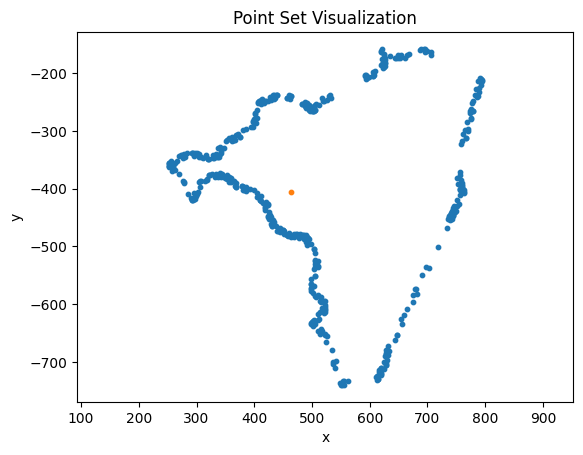

In [ ]:
# 从点集列表A中提取x坐标和y坐标
x = [point[0] for point in point_A]
y = [-point[1] for point in point_A]

X=best_point[0]
Y=-best_point[1]

# 设置点的大小
point_size = 10  # 设置点的大小为50


# 绘制散点图

kp1=plt.scatter(x, y, s=point_size)

kp2=plt.scatter(X, Y, s=point_size)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Set Visualization')
# 设置X轴和Y轴比例为1:1
plt.axis('equal')



# 显示图形
plt.show()

# 遗传算法计算中心点（对第二个图操作）

In [ ]:
# 示例用法
point_set_B = point_B
best_pointB = genetic_algorithm(point_set_B)
print("最佳点：", best_pointB)

最佳点： [528.76964355 419.91107742]


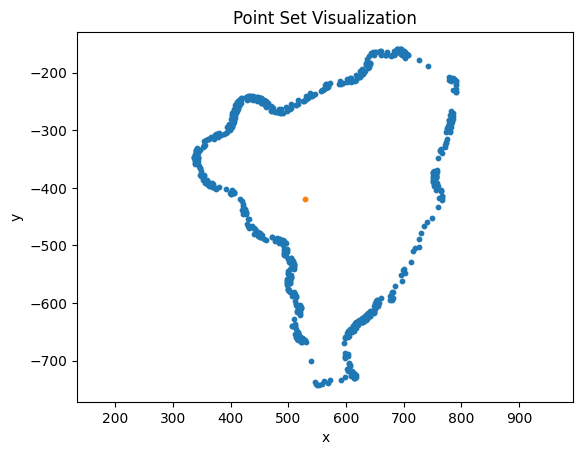

In [ ]:
# 从点集列表A中提取x坐标和y坐标
x = [point[0] for point in point_B]
y = [-point[1] for point in point_B]

X=best_pointB[0]
Y=-best_pointB[1]

# 设置点的大小
point_size = 10  # 设置点的大小为50


# 绘制散点图

kp1_2=plt.scatter(x, y, s=point_size)

kp2_2=plt.scatter(X, Y, s=point_size)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Set Visualization')
# 设置X轴和Y轴比例为1:1
plt.axis('equal')



# 显示图形
plt.show()

# 转化为极坐标

**对于第一个图**

In [ ]:
def visualize_polar(point_set, center_point):
    # 将点集A中的每个点转换为极坐标
    polar_coords = []
    for point in point_set:
        dx = point[0] - center_point[0]
        dy = point[1] - center_point[1]
        r = np.sqrt(dx**2 + dy**2)
        theta = np.arctan2(dy, dx)
        polar_coords.append((r, theta))

    # 绘制极坐标图
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.scatter([coord[1] for coord in polar_coords], [coord[0] for coord in polar_coords])

    # 设置极坐标轴的样式
    ax.spines['polar'].set_visible(False)  # 隐藏极坐标轴线
    ax.set_yticklabels([])  # 关闭半径刻度

    # 设置标题
    ax.set_title("Polar Visualization", pad=20)

    # 显示图形
    plt.show()

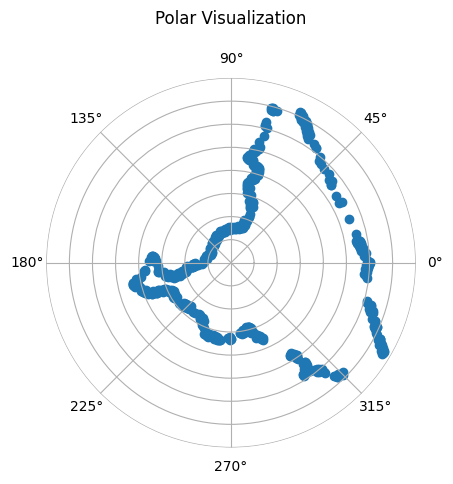

In [ ]:
# 示例用法
point_set = point_A # 点集A
center_point = best_point  # 点C，极坐标的原点
visualize_polar(point_set, center_point)

**对第二个图**

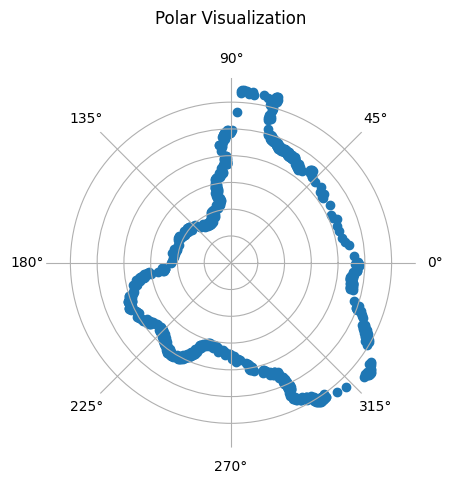

In [ ]:
# 示例用法
point_setB = point_B # 点集B
center_pointB = best_pointB  # 点C，极坐标的原点
visualize_polar(point_setB, center_pointB)

**将直角坐标转化为极坐标**

In [ ]:
polar_coordsA = []
for point in point_set:

        dx = point[0] - center_point[0]
        dy = point[1] - center_point[1]
        r = np.sqrt(dx**2 + dy**2)
        theta = np.arctan2(dy, dx)
        degrees = np.degrees(theta)#此时转化为角度制
        polar_coordsA.append((r, degrees))


polar_coordsB = []
for point in point_setB:

        dx = point[0] - center_pointB[0]
        dy = point[1] - center_pointB[1]
        r = np.sqrt(dx**2 + dy**2)
        theta = np.arctan2(dy, dx)
        degrees = np.degrees(theta)#此时转化为角度制
        polar_coordsB.append((r, degrees))

In [ ]:
polar_coordsA[0]

(314.2191384794102, 55.14166067427321)

**将点集按角度从小到大排序，最小为-π，最大为π将点集按角度从小到大排序，最小为-π，最大为π**

In [ ]:
polar_coordsA_1 = sorted(polar_coordsA, key=lambda point: point[1])

polar_coordsB_1 = sorted(polar_coordsB, key=lambda point: point[1])

In [ ]:
polar_coordsB_1[0]

(112.7733238307404, -179.53711164199805)

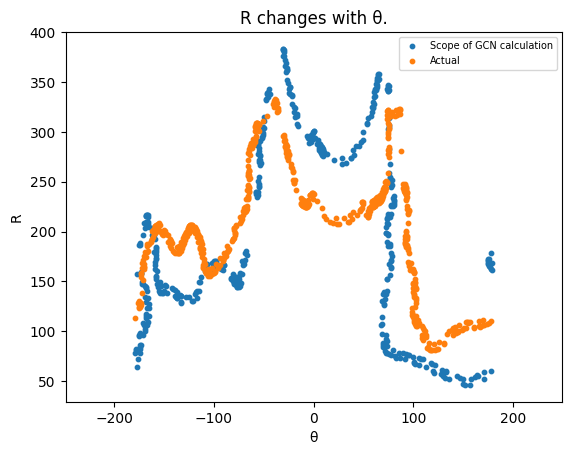

In [ ]:
# 从点集列表A中提取角度和边长，注意U,V的顺序
u = [point[0] for point in polar_coordsA_1]
v = [point[1] for point in polar_coordsA_1]

u_B=[point[0] for point in polar_coordsB_1]
v_B=[point[1] for point in polar_coordsB_1]

# 设置点的大小
point_size = 10  # 设置点的大小为50


# 绘制散点图

P1=plt.scatter(v, u, s=point_size,label="Scope of GCN calculation")
P2=plt.scatter(v_B, u_B, s=point_size,label="Actual")

plt.legend(   loc='upper right',fontsize=7   ) # 添加图例

plt.xlabel('θ')
plt.ylabel('R')
plt.title('R changes with θ.')
# 设置X轴和Y轴比例为1:1
plt.axis('equal')



# 显示图形
plt.show()